In [4]:
import pandas as pd
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

p = r"C:\Users\paulk\OneDrive - University of Toronto\engineering_masters\thesis work\code"
name = "decision_data_new.xlsx"


df = pd.read_excel(os.path.join(p, name), "sys2")

#split the data accordingly to avoid overfitting
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(labels=['direction'], axis=1), 
                                                           df['direction'],
                                                           test_size = 0.3,
                                                           random_state = 0)




In [9]:
X_train.head()

,1-hot-first,1-hot-last,Gradient_1,1-hot-first_2,1-hot_last_2,Gradient_2,1-hot_second,1-hot_second_peak_2,1-hot_second_last,1-hot_second_last_2,first_peak_differential,last_peak_differential
60,1,1,0.071151,0,1,0.100186,0,1,0,0,0,0
2,0,0,0.012395,1,0,-0.310473,1,0,1,1,1,1
142,0,0,0.139662,1,1,-0.058320,1,0,1,0,1,1
43,1,1,-0.074577,0,1,0.324896,0,1,0,0,0,0
66,1,1,-0.015533,0,1,0.314665,0,1,0,0,0,0


In [33]:
mut_info = pd.Series(mutual_info_classif(X_train, Y_train))
mut_info.index = X_train.columns
mut_info.sort_values(ascending=False)

name = "new_datas_sys2.csv"
#the first method of pruning should be the correlation matrix, open new df
df = pd.read_csv(os.path.join(p, name))
mut_info.sort_values(ascending=False)



Gradient_2                 0.843256
1-hot-first_2              0.703233
1-hot_second_peak_2        0.668830
1-hot_second_last          0.569864
Gradient_1                 0.517258
1-hot-last                 0.490803
first_peak_differential    0.476231
1-hot-first                0.465816
last_peak_differential     0.444993
1-hot_second               0.443222
1-hot_last_2               0.365407
1-hot_second_last_2        0.302444
dtype: float64

In [18]:
#drop the required cols
df_trim = df.drop(['1-hot-first', '1-hot-last', '1-hot-first_2', '1-hot_last_2', '1-hot_second', '1-hot_second_peak_2',
        '1-hot_second_last', '1-hot_second_last_2'], axis=1)
df_trim.head()



,first_peak,second_peak,second_last_peak,last_peak,first_peak_2,second_peak_2,second_last_peak_2,last_peak_2,second_peak.1,Gradient_1,Gradient_2,first_peak_differential,last_peak_differential,direction
0,1.101675,4.122714,4.122714,1.772473,3.427435,0.068549,3.672252,1.762681,4.122714,0.083217,-0.289848,1,1,left
1,4.112922,0.166475,0.494530,3.481294,0.572871,4.132507,1.449315,3.060210,0.166475,-0.037267,0.444666,0,0,right
2,1.625583,4.122714,4.117818,1.733303,3.398057,0.097927,4.132507,1.586413,4.122714,0.012395,-0.310473,1,1,left
3,2.918216,0.044067,0.690383,3.344197,0.563079,4.132507,1.209395,3.025935,0.044067,0.121345,0.412427,0,0,right
4,1.738199,4.122714,4.122714,1.787162,3.388264,0.068549,4.137403,1.610894,4.122714,0.006156,-0.305920,1,1,left


In [23]:
#now calculate the correlation matrix 
# well first variance - we want to see variance. if it is low that means there is low spread in the data and this
# would indicate low dependance 

df_var = df.std()
df_var = df_var.sort_values(ascending=False)
df_var

Gradient_2                 3501.491717
Gradient_1                 2719.220164
second_peak_2                 1.979021
second_peak.1                 1.951272
second_peak                   1.951272
second_last_peak              1.708732
second_last_peak_2            1.516286
first_peak_2                  1.100767
first_peak                    1.084112
last_peak                     0.812629
last_peak_2                   0.749387
1-hot_last_2                  0.716762
1-hot_second_peak_2           0.712672
1-hot_second_last_2           0.691514
1-hot-first_2                 0.688308
1-hot_second                  0.637036
1-hot_second_last             0.632930
1-hot-last                    0.629550
1-hot-first                   0.623497
first_peak_differential       0.501735
last_peak_differential        0.482959
dtype: float64

In [17]:
#from the variance test we see the last and first peak differential has the lowest and barely passes threshold (0.5). 
# We however know these are actually the most important in the decision tree

#now calculate the correlation matrix
# pandas lets us do this

import matplotlib.pyplot as plt
df_trim = df_trim.drop(["second_peak.1"], axis=1)
correlations = df_trim.corr()


plt.matshow(correlations)
plt.show()

correlations

#from the figure it is clear the peak features have high correlation among them.

NameError: name 'df_trim' is not defined

In [40]:
df_trim = df_trim.fillna(9999)
df_trim_2 = df_trim.drop(['last_peak', 'first_peak', 'second_last_peak','last_peak_2'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(df_trim_2.drop(labels=['direction'], axis=1), 
                                                           df_trim_2['direction'],
                                                           test_size = 0.3,
                                                           random_state = 0)



mut_info = pd.Series(mutual_info_classif(X_train, Y_train))
mut_info.index = X_train.columns
mut_info.sort_values(ascending=False)

#form analysis, drop first_peak, last_peak/2, second_last_peak/2, 
mut_info.sort_values(ascending=False)

#all the features have sufficiently high information gain.

Gradient_2                 0.996750
first_peak_2               0.770247
second_peak                0.760545
second_last_peak_2         0.747374
second_peak_2              0.731027
Gradient_1                 0.724892
first_peak_differential    0.405440
last_peak_differential     0.368331
dtype: float64

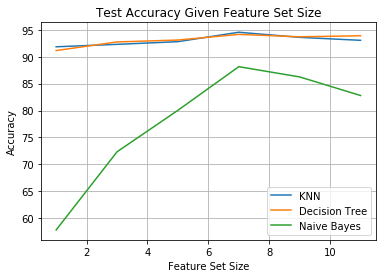

In [23]:
import seaborn as sns

y_in_knn = [91.85, 92.30, 92.80, 94.55, 93.60, 93.05]
y_in_dt = [91.15, 92.75 ,93.1, 94.15, 93.7, 93.9]
y_in_nb = [57.83, 72.34, 80.05, 88.15, 86.25, 82.80]


x_in = [1, 3, 5, 7, 9, 11]

df = pd.DataFrame({"x":x_in, "KNN":y_in_knn, "Decision Tree":y_in_dt, "Naive Bayes":y_in_nb})
#df.columns=["x", "KNN", "Decision Tree", "Naive Bayes"]

sns.lineplot(data=df, x="x", y="KNN")
sns.lineplot(data=df, x="x", y="Decision Tree")
sns.lineplot(data=df, x="x", y="Naive Bayes")

plt.title("Test Accuracy Given Feature Set Size")
plt.xlabel("Feature Set Size")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(["KNN", "Decision Tree", "Naive Bayes"])